In [35]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [25]:
songs = Table().with_columns(
    'song', ['Idola', 'Kiss Kiss Kiss', 'Clarity', 'ECHO', 'Papermoon', 'Into the Night', 'Nostalogic', 'Connect', 'Rolling Girl'],
    'difficulty', [8, 5, 2, 6, 7, 5, 6, 7, 6],
    'bpm', [190, 201, 128, 165, 175, 160, 180, 172, 190],
    'length', [150, 104, 110, 130, 140, 120, 135, 128, 145]
)
songs

song,difficulty,bpm,length
Idola,8,190,150
Kiss Kiss Kiss,5,201,104
Clarity,2,128,110
ECHO,6,165,130
Papermoon,7,175,140
Into the Night,5,160,120
Nostalogic,6,180,135
Connect,7,172,128
Rolling Girl,6,190,145


In [ ]:
intermediate_songs = songs.where('difficulty', are.between_or_equal_to(5, 7))
intermediate_songs

song,difficulty,bpm,length
Kiss Kiss Kiss,5,201,104
ECHO,6,165,130
Into the Night,5,160,120
Nostalogic,6,180,135
Rolling Girl,6,190,145


In [10]:
kristen_songs = intermediate_songs.sort('difficulty').take(np.arange(5)).column('song')
kristen_songs

array(['Kiss Kiss Kiss', 'Into the Night', 'ECHO', 'Nostalogic',
       'Rolling Girl'],
      dtype='<U14')

In [12]:
np.random.choice(kristen_songs, 1)

array(['Into the Night'],
      dtype='<U14')

In [13]:
ethan_artists = make_array("NAOKI", "Junko", "Ryutaro")
artists = Table().with_columns(
    'artist', ['NAOKI', 'Riyu', 'Sota', 'NAOKI'],
    'song', ['Kiss Kiss Kiss', 'Honey Punch', 'Blew my Mind', 'Red Zone']
)
artists

artist,song
NAOKI,Kiss Kiss Kiss
Riyu,Honey Punch
Sota,Blew my Mind
NAOKI,Red Zone


In [27]:
#advanced_songs = songs.where('difficulty', are.above_or_equal_to(8))
advanced_songs = songs
songs_and_artists = advanced_songs.join('song', artists, 'song')
ethan_songs = songs_and_artists.where('artist', are.contained_in(ethan_artists))
ethan_songs

song,difficulty,bpm,length,artist
Kiss Kiss Kiss,5,201,104,NAOKI


In [30]:
def get_first(arr):
    return arr.item(0)
songs_and_artists.sort('length').pivot("difficulty", "artist", "song", get_first).show()

artist,5
NAOKI,Kiss Kiss Kiss


In [31]:
heights = Table().with_columns(
    'height', [68.5, 62.1, 66.5],
    'enrollee', ['college', 'high school', 'college']
)
heights

height,enrollee
68.5,college
62.1,high school
66.5,college


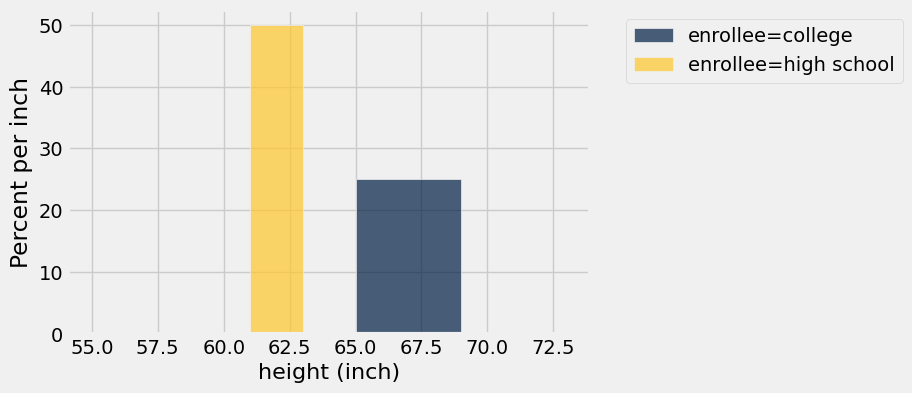

In [38]:
heights.hist('height', bins=np.arange(55, 75, 2), group='enrollee', unit='inch')

In [40]:
def count_arr_occurences(arr, value):
  count = 0
  for x in arr:
    if x == value:
      count = count + 1
  return count 
print(count_arr_occurences(make_array(0,1,0,5,1), 1))
print(count_arr_occurences(make_array("a", "b", "c"), "c"))

2
1


In [41]:
sum((np.arange(131, 138) - 135) >= 0) 

3

In [42]:
x=1
for i in make_array(3, 2, -1): 
  x=x*i 
print(x) 

-6


In [43]:
arr1 = make_array(1, 2, 3)
arr2 = make_array(4, 5, 6)
len(np.append(arr1, arr2)) != len(arr1 + arr2)

True

In [44]:
make_array(2, 3, 4) - make_array(1, 2, 3)

array([1, 1, 1])

In [45]:
sum(make_array(1, 2, 12) >= 2)

2

In [77]:
trash = make_array('bottle', 'bottle', 'bottle', 'box', 'box', 'food')
def bottles(n):
  "Return the number of bottles in a random sample of n pieces of trash."
  return sum(np.random.choice(trash, n) == 'bottle')

results = make_array()
for i in np.arange(10000):
  results = np.append(results, bottles(20))
p = np.count_nonzero(results >= 12) / len(results) # np.mean(results >= 12)
p

0.2595

In [ ]:
def half_abs_sum(a):
  "Return half the sum of the absolute values of a single array."
  return sum(np.abs(a)) / 2

obs = make_array(392, 21, 0)                              # An array of counts
dist = make_array(1e11, 1e10, 1e9) / (1e11 + 1e10 + 1e9)  # An array of proportions
observed_stat = half_abs_sum(
    obs - sum(obs) * dist # obs / sum(obs) - dist 
)

stats = make_array()

for i in np.arange(10000):
  sample = sample_proportions(sum(obs), dist)
  stats = np.append(stats, half_abs_sum(
    (sample - dist) * sum(obs) # sample - dist 
))
p_value = np.count_nonzero(stats >= observed_stat) / 10000 # sum(stats >= observed_stat) 
p_value

0.0014